In [44]:
from sklearn.linear_model import Lasso
import numpy as np
import random
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import math

np.set_printoptions(suppress=True)

In [53]:
# 加载数据
file_path = r'C:\Users\海棠微雨\Desktop\数据处理\高钾.xlsx'  # 数据文件路径
df = pd.read_excel(file_path, sheet_name='Sheet1')  # 从Excel文件中加载数据，读取名为'表单1'的工作表

# 将空值赋值为0
df = df.fillna(0)
# df = df.drop(['氧化镁(MgO)', '氧化锡(SnO2)'], axis=1)
# 提取特征矩阵X（去除第一列和最后一列）
X = df.iloc[:, 1:-1].values

# 归一化特征矩阵X
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
# 提取标签y（最后一列）
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3)


(0.0, 1.0)

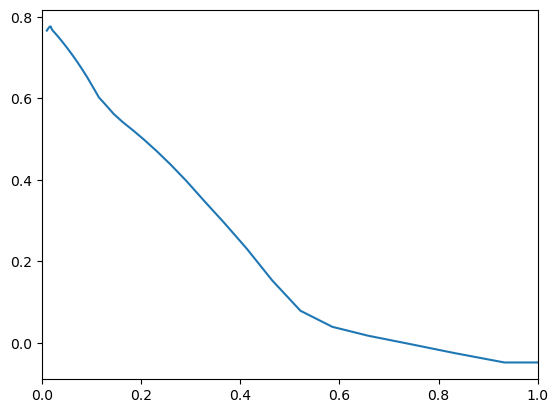

In [54]:
r2, coefs = [], []
alpha_range = np.logspace(-2, 3, 100)

for a in alpha_range:
    lasso = Lasso(alpha = a)
    lasso.fit(X_train, y_train)
    r2.append(lasso.score(X_test, y_test))
    coefs.append(lasso.coef_)
    
plt.plot(alpha_range, r2)
plt.gca().set_xlim(0, 1)

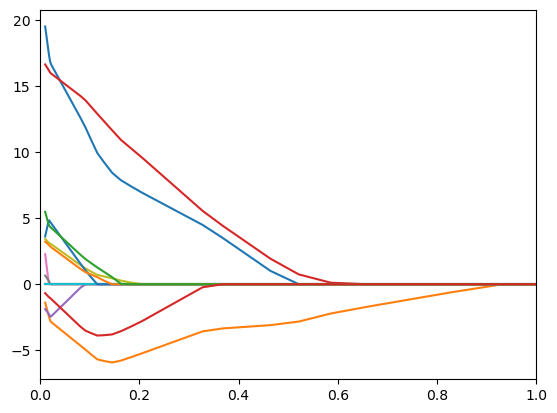

In [55]:
plt.plot(alpha_range, coefs)
plt.gca().set_xlim(0, 1)
plt.show()

套索回归,进行训练

In [58]:
#稀松性质,将一部分系数变成0
lasso = Lasso(alpha=0.09, max_iter=10000)
lasso.fit(X_normalized, y)

# 输出非零系数对应的特征
selected_features = df.columns[1:-1][lasso.coef_ != 0]
print("Selected Features:", selected_features)

lasso.score(X_test, y_test)

Selected Features: Index(['二氧化硅(SiO2)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化铝(Al2O3)', '氧化铜(CuO)',
       '氧化锶(SrO)', '氧化锡(SnO2)'],
      dtype='object')


0.9647940009911811

In [61]:
# 在原始数据框中提取这些特征列
selected_df = df[list(selected_features)]

# 保存为 Excel 表格
selected_df.to_excel('selected_features_data_K.xlsx', index=False)

随机梯度下降进行对比

In [41]:
sgd = SGDRegressor(penalty='l1', alpha=0)

sgd.fit(X_normalized, y.ravel())
print(sgd.coef_)
print(sgd.intercept_)

[40.69594031  6.82891015 11.53056855  9.17600418  7.85749285 11.72543084
  2.41409    12.49235252  2.76927488 -0.7356397   3.95058431  0.94232381
  3.31273842 -0.22021751]
[53.58452139]
